In [31]:
#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.
import numpy as np
import scipy
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
X, Y = load_Q1_dataset()
print('X:', X.shape, 'Y:', Y.shape)
Xtrn = X[100: ,:]; Ytrn =Y[100:]
Xtst = X[0:100, :]; Ytst = Y[0:100]

X: (800, 9) Y: (800,)


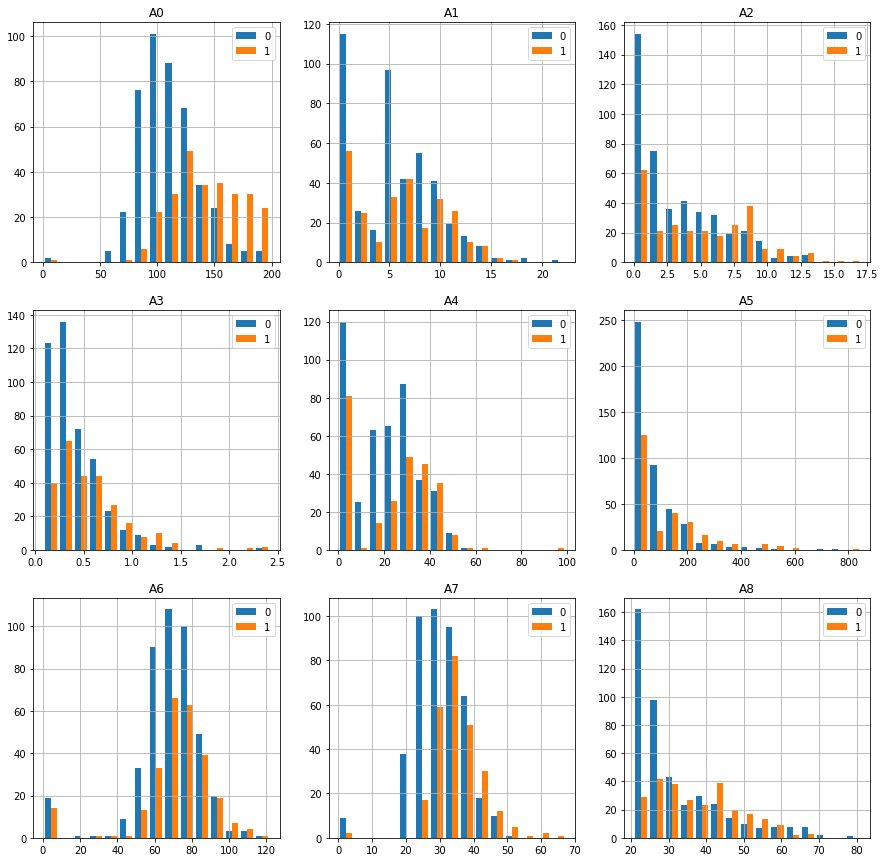

In [32]:
# Q1.1
def iaml212cw2_q1_1():
    plt.rcParams["figure.figsize"] = (8,5)
    label_0_loc = np.where(Ytrn == 0)[0]
    label_1_loc = np.where(Ytrn == 1)[0]
    Xaa = []
    Xbb = []
    Conc = np.concatenate((Xtrn, Ytrn[:, None]), axis=1)
    for i in range(700):
        if i in label_0_loc:
            Xaa.append(Conc[i])
        else:
            Xbb.append(Conc[i])
    f, ax = plt.subplots(3, 3, figsize=(15,15))
    for i in range(9):
        Xa = [item[i] for item in Xaa]
        Xb = [item[i] for item in Xbb]
        x = i % 3
        y = i // 3
        ax[y, x].hist([Xa,Xb], bins=15)
        strings = 'A' + str(i)
        ax[y, x].set_title(strings)
    for row in ax: 
        for ax in row: 
            ax.grid()
            ax.legend(('0','1'))
    f.savefig(fname='png')
iaml212cw2_q1_1()

In [33]:
# Q1.2
def iaml212cw2_q1_2():
    r = []
    for i in range(9):
        Xfeat = [item[i] for item in Xtrn]
        r.append(np.corrcoef(Xfeat, Ytrn)[0][1])
    print(r)
iaml212cw2_q1_2()

[0.49117589690804586, 0.08740589845788765, 0.2272871915395838, 0.2073660529898688, 0.10772034997696235, 0.1856714007677247, 0.07626074493410927, 0.3044537676199448, 0.24034733335192413]


# Q1.3
def iaml212cw2_q1_3():
#
# iaml212cw2_q1_3()   # comment this out when you run the function

16645.636599722257


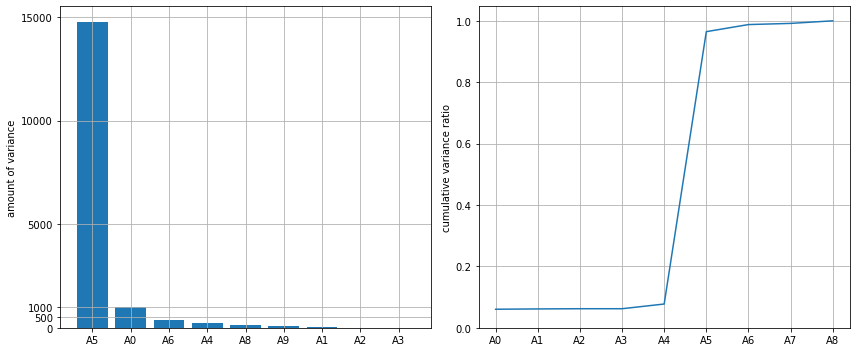

In [34]:
# Q1.4    
def iaml212cw2_q1_4():
    variances = []
    for i in range(9):
        Xfeat = [item[i] for item in Xtrn]
        variances.append(sum([(x - np.mean(Xfeat))**2 for x in Xfeat])/(len(Xfeat)-1))
    sorted_variances = np.sort(variances)[::-1]
    sum_var = np.sum(variances)
    print(sum_var)
    y_graph2 = [x/sum_var for x in variances]
    y_graph2_cum = []
    for i in range(9):
        y_graph2_cum.append(sum(y_graph2[0:i+1]))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    xticks = ["A5", "A0","A6","A4","A8","A9","A1","A2","A3"]
    xticks2 = ["A0", "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8"]
    axes[0].bar(xticks, sorted_variances)
    axes[0].set_ylabel("amount of variance")
    axes[0].set_yticks([0, 500, 1000, 5000, 10000, 15000])
    axes[1].set_ylabel("cumulative variance ratio")
    axes[1].plot(xticks2, y_graph2_cum)
    axes[1].set_ylim(ymin=0)
    fig.tight_layout()
    for graph in axes: 
        graph.grid()
iaml212cw2_q1_4()   # comment this out when you run the function

16645.636599722267
[0.38559301420690023, -0.04582516082225114, -0.0570515051364167, 0.18579338880949564, 0.45924021835727846, 0.9996780135176875, 0.10057182197062052, 0.23230210476652127, -0.0015740705358918397]
[-0.9142889454225337, -0.09077312003733051, -0.22546263478229114, -0.07987177012105028, 0.0971645653932254, 0.02408468708546695, -0.2553920087660299, -0.17260644028984368, -0.37344376883126884]


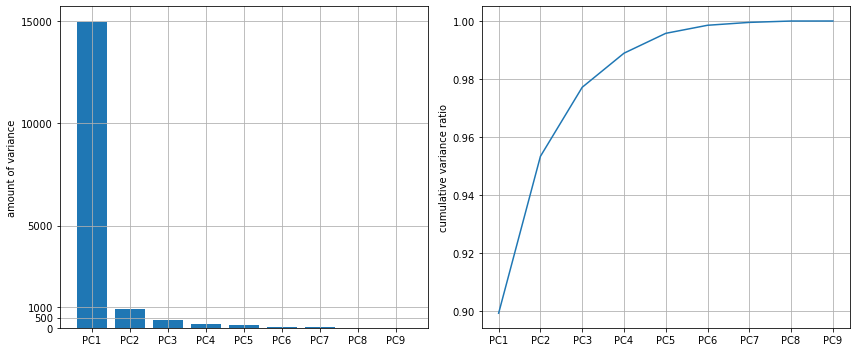

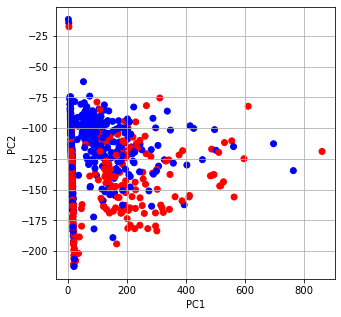

In [35]:
# Q1.5
def iaml212cw2_q1_5():
    pca = PCA()
    X_new = pca.fit(Xtrn)
    X_dot=Xtrn.dot(pca.components_.T)
    variances = pca.explained_variance_
    print(sum(variances))
    sum_var = np.sum(variances)
    y_graph2 = [x/sum_var for x in variances]
    y_graph2_cum = []
    for i in range(9):
        y_graph2_cum.append(sum(y_graph2[0:i+1]))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    xticks = ["PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9"]
    axes[0].bar(xticks, variances)
    axes[0].set_yticks([0, 500, 1000, 5000, 10000, 15000])
    axes[0].set_ylabel("amount of variance")
    axes[1].set_ylabel("cumulative variance ratio")
    axes[1].plot(xticks, y_graph2_cum)
    fig.tight_layout()
    for graph in axes: 
        graph.grid()
    colours = np.where(Ytrn==1,'r','b')
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    axes.scatter(X_dot[:,0], X_dot[:,1],c=colours)
    axes.set_xlabel('PC1')
    axes.set_ylabel('PC2')
    axes.grid()
    r1 = []
    r2 = []
    for i in range(9):
        Xfeat = [item[i] for item in Xtrn]
        pc = [item[0] for item in X_dot]
        r1.append(np.corrcoef(Xfeat, pc)[0][1])
    for i in range(9):
        Xfeat = [item[i] for item in Xtrn]
        pc2 = [item[1] for item in X_dot]
        r2.append(np.corrcoef(Xfeat, pc2)[0][1])
    print(r1)
    print(r2)
iaml212cw2_q1_5()   # comment this out when you run the function

9.01287553648069
[0.6006713897085361, 0.05729590985040144, 0.26795203223120023, 0.36565546513764285, 0.6230382061060178, 0.6298568548408795, 0.522850721594456, 0.6511607443951046, 0.35286443238025444]
[0.17743225164359916, 0.10003686429568928, 0.7599827142218685, -0.20764337153009607, -0.46599042048329165, -0.36979586693725985, 0.22422808654293153, -0.16844950994503782, 0.7812491257116682]


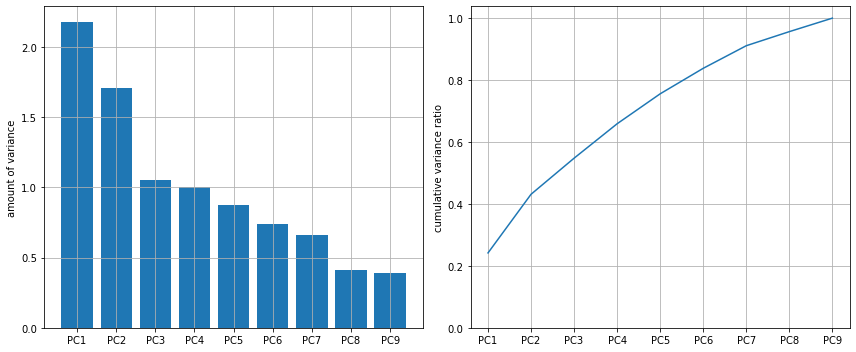

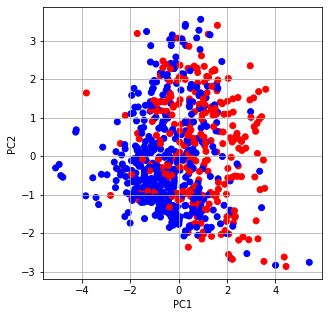

In [36]:
# Q1.6
def iaml212cw2_q1_6():
    scaler = StandardScaler().fit(Xtrn)
    Xtrn_s = scaler.transform(Xtrn)    # standardised training data
    Xtst_s = scaler.transform(Xtst)    # standardised test data
    pca = PCA()
    X_new = pca.fit(Xtrn_s)
    X_dot=Xtrn_s.dot(pca.components_.T)
    variances = pca.explained_variance_
    print(sum(variances))
    sum_var = np.sum(variances)
    y_graph2 = [x/sum_var for x in variances]
    y_graph2_cum = []
    for i in range(9):
        y_graph2_cum.append(sum(y_graph2[0:i+1]))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    xticks = ["PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9"]
    axes[0].bar(xticks, variances)
    axes[0].set_ylabel("amount of variance")
    axes[1].set_ylabel("cumulative variance ratio")
    axes[1].plot(xticks, y_graph2_cum)
    axes[1].set_ylim(ymin=0)
    fig.tight_layout()
    for graph in axes: 
        graph.grid()
    colors = np.where(Ytrn==1,'r','b')
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    axes.scatter(X_dot[:,0],X_dot[:,1],c=colors)
    axes.set_xlabel('PC1')
    axes.set_ylabel('PC2')
    axes.grid()
    r1 = []
    r2 = []
    for i in range(9):
        Xfeat = [item[i] for item in Xtrn]
        pc = [item[0] for item in X_dot]
        r1.append(np.corrcoef(Xfeat, pc)[0][1])
    for i in range(9):
        Xfeat = [item[i] for item in Xtrn]
        pc2 = [item[1] for item in X_dot]
    print(r1)
    print(r2)
iaml212cw2_q1_6()   # comment this out when you run the function

# Q1.7
def iaml212cw2_q1_7():
#
# iaml212cw2_q1_7()   # comment this out when you run the function

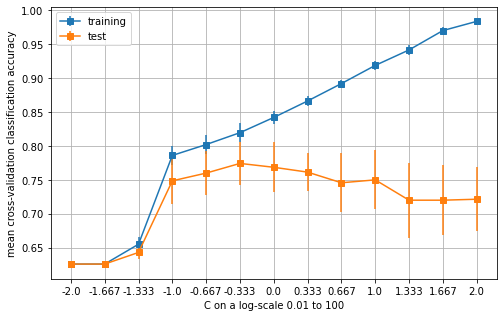

[0.6257142857142857, 0.6257142857142857, 0.655, 0.7860714285714285, 0.8021428571428573, 0.8196428571428573, 0.8421428571428571, 0.8664285714285714, 0.8921428571428571, 0.9189285714285715, 0.9417857142857144, 0.9703571428571429, 0.9839285714285715]
0.75
75.0


In [37]:
# Q1.8
def iaml212cw2_q1_8():
    scaler = StandardScaler().fit(Xtrn)
    Xtrn_s = scaler.transform(Xtrn)    # standardised training data
    Xtst_s = scaler.transform(Xtst) 
    trn_scores_mean = [[]] * 13
    trn_scores_std = [[]] * 13
    tst_scores_mean = [[]] * 13
    tst_scores_std = [[]] * 13
    skf = StratifiedKFold(n_splits=5)
    for i, j in enumerate(np.logspace(-2, 2, num = 13)):
        svc_rbf = SVC(kernel='rbf', C=j)
        trn_scores_temp = []
        tst_scores_temp = []
        for train_index, test_index in skf.split(Xtrn_s, Ytrn):
            X_train, X_test = Xtrn_s[train_index], Xtrn_s[test_index]
            Y_train, Y_test = Ytrn[train_index], Ytrn[test_index]
            svc_rbf.fit(X_train, Y_train)
            trn_scores_temp.append(svc_rbf.score(X_train, Y_train))
            tst_scores_temp.append(svc_rbf.score(X_test, Y_test))
        trn_scores_mean[i] = np.mean(trn_scores_temp)
        trn_scores_std[i] = np.std(trn_scores_temp)
        tst_scores_mean[i] = np.mean(tst_scores_temp)
        tst_scores_std[i] = np.std(tst_scores_temp)
    xt = []
    for i in range(13):
        xt.append(str(round(np.log10(np.logspace(-2, 2, num = 13)[i]),3)))
    plt.errorbar(xt, trn_scores_mean, yerr=trn_scores_std, linestyle='-', marker='s', label='training')
    plt.errorbar(xt, tst_scores_mean, yerr=tst_scores_std, linestyle='-', marker='s', label='test')
    plt.xlabel("C on a log-scale 0.01 to 100")
    plt.ylabel("mean cross-validation classification accuracy")
    plt.grid()
    plt.legend()
    plt.show()
    print(trn_scores_mean)
    svc_rbf = SVC(kernel='rbf', C=np.logspace(-2, 2, num = 13)[5])
    svc_rbf.fit(Xtrn_s, Ytrn)
    print(svc_rbf.score(Xtst_s, Ytst))
    print((svc_rbf.score(Xtst_s, Ytst))*100)
    
iaml212cw2_q1_8()   # comment this out when you run the function

[27.020943396226414, 31.093207547169815]
[[95.14113475 41.46999034]
 [41.46999034 46.69341618]]


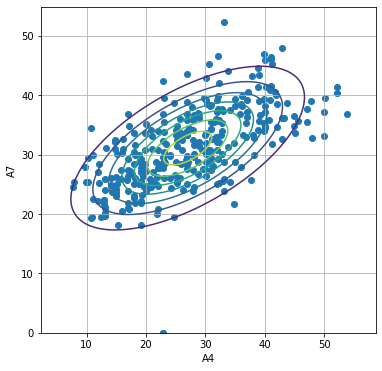

In [38]:
# Q1.9
def iaml212cw2_q1_9():
    label_0_loc = np.where(Ytrn == 0)[0]
    data_label_0 = []
    for i in range(700):
        if i in label_0_loc:
            data_label_0.append(Xtrn[i])
    drop_loc = []
    for i in range(438):
        if data_label_0[i][4]<1:
            drop_loc.append(i)
    data_simpler = []
    for i in range(438):
        if i not in drop_loc:
            data_simpler.append(data_label_0[i])
    simpler_A4 = []
    simpler_A7 = []
    for i in range(318):
        simpler_A4.append(data_simpler[i][4])
        simpler_A7.append(data_simpler[i][7])
    Ztrn = list(zip(simpler_A4, simpler_A7))
    sample_mean_vector = []
    sample_mean_vector.append(np.mean(simpler_A4))
    sample_mean_vector.append(np.mean(simpler_A7))
    Ztrn = np.asarray(Ztrn)
    sample_cov_matrix = np.cov(Ztrn.T)
    print(sample_mean_vector)
    print(sample_cov_matrix)
    X = np.linspace(7, 54, 318)
    Y = np.linspace(0, 52, 318)
    X1, Y1 = np.meshgrid(X,Y)
    rv=stats.multivariate_normal(sample_mean_vector, sample_cov_matrix)
    plt.figure(figsize=(6,6))
    plt.axis('equal')
    plt.scatter(simpler_A4,simpler_A7)
    plt.contour(X1,Y1,rv.pdf(np.dstack([X1, Y1])))
    plt.xlabel('A4')
    plt.ylabel('A7')
    plt.grid()
    plt.show()
iaml212cw2_q1_9()   # comment this out when you run the function

[27.020943396226414, 31.093207547169815]
[[95.14113475  0.        ]
 [ 0.         46.69341618]]


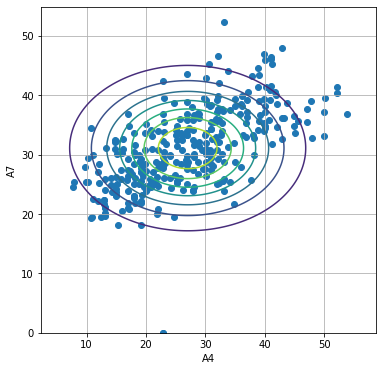

In [39]:
# Q1.10
def iaml212cw2_q1_10():
    label_0_loc = np.where(Ytrn == 0)[0]
    data_label_0 = []
    for i in range(700):
        if i in label_0_loc:
            data_label_0.append(Xtrn[i])
    drop_loc = []
    for i in range(438):
        if data_label_0[i][4]<1:
            drop_loc.append(i)
    data_simpler = []
    for i in range(438):
        if i not in drop_loc:
            data_simpler.append(data_label_0[i])
    simpler_A4 = []
    simpler_A7 = []
    for i in range(318):
        simpler_A4.append(data_simpler[i][4])
        simpler_A7.append(data_simpler[i][7])
    Ztrn = list(zip(simpler_A4, simpler_A7))
    sample_mean_vector = []
    sample_mean_vector.append(np.mean(simpler_A4))
    sample_mean_vector.append(np.mean(simpler_A7))
    print(sample_mean_vector)
    Ztrn = np.asarray(Ztrn)
    sample_cov_matrix = np.cov(Ztrn.T)
    sample_cov_matrix[0][1] = 0
    sample_cov_matrix[1][0] = 0
    print(sample_cov_matrix)
    X = np.linspace(7, 54, 318)
    Y = np.linspace(0, 52, 318)
    X1, Y1 = np.meshgrid(X,Y)
    rv=stats.multivariate_normal(sample_mean_vector, sample_cov_matrix)
    plt.figure(figsize=(6,6))
    plt.axis('equal')
    plt.scatter(simpler_A4,simpler_A7)
    plt.contour(X1,Y1,rv.pdf(np.dstack([X1, Y1])))
    plt.xlabel('A4')
    plt.ylabel('A7')
    plt.grid()
    plt.show()
iaml212cw2_q1_10()   # comment this out when you run the function